# Pasos iniciales

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import matplotlib.cm as cm
import matplotlib as mpl

In [ ]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 15)
colores = cmap(saltos)

In [ ]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


# Conversion de moneda, todo a dolar

In [ ]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount'] = entrenamiento['Total_Amount']*0.0096
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'JPY', 'Total_Amount_Currency'] = 'USD'

In [ ]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount'] = entrenamiento['Total_Amount']*1.17
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'EUR', 'Total_Amount_Currency'] = 'USD'

In [ ]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount'] = entrenamiento['Total_Amount']*0.70
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'AUD', 'Total_Amount_Currency'] = 'USD'

In [ ]:
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount'] = entrenamiento['Total_Amount']*1.29
entrenamiento.loc[entrenamiento['Total_Amount_Currency'] == 'GBP', 'Total_Amount_Currency'] = 'USD'

# Hay que filtrar

In [ ]:
entrenamiento.loc[entrenamiento['Region'] == 'Japan', 'Territory'] = 'Japan'
df = entrenamiento.loc[:,['Territory', 'TRF','Total_Amount']]

In [ ]:
grouped = df.groupby('Territory').agg({'TRF':'sum','Territory':'count'})
grouped.rename(columns={'TRF':'Total TRF', 'Territory':'Total opportunities'}, inplace=True)
grouped.sort_values('Total TRF', ascending=False, inplace=True)
grouped

,Total TRF,Total opportunities
Territory,,
Australia,6866,1208
NW America,4959,1568
SE America,4342,493
NE America,3464,760
Germany,3386,1682
...,...,...
Malta,0,6
Monaco,0,1
Burma,0,1


# Oportunidades por Pais


In [ ]:
oportunidades_por_pais = grouped['Total opportunities'].to_frame()
oportunidades_por_pais.reset_index(inplace=True)
oportunidades_por_pais.sort_values('Total opportunities', ascending=False, inplace=True)
oportunidades_por_pais


,Territory,Total opportunities
9,Japan,4892
4,Germany,1682
1,NW America,1568
0,Australia,1208
6,India,809
...,...,...
69,Egypt,1
70,Czech Republic,1
72,Monaco,1
73,Burma,1


### Con No_especificados

In [ ]:
top10 = oportunidades_por_pais.head(10)
top10.replace('None','No_especificado', inplace=True)
top10

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Territory,Total opportunities
9,Japan,4892
4,Germany,1682
1,NW America,1568
0,Australia,1208
6,India,809
5,No_especificado,788
3,NE America,760
10,Netherlands,533
2,SE America,493
8,France,449


In [ ]:
top10 = top10.set_index('Territory')
top10

,Total opportunities
Territory,
Japan,4892
Germany,1682
NW America,1568
Australia,1208
India,809
No_especificado,788
NE America,760
Netherlands,533
SE America,493


In [ ]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0, 1, 100)
colores2 = cmap(saltos)

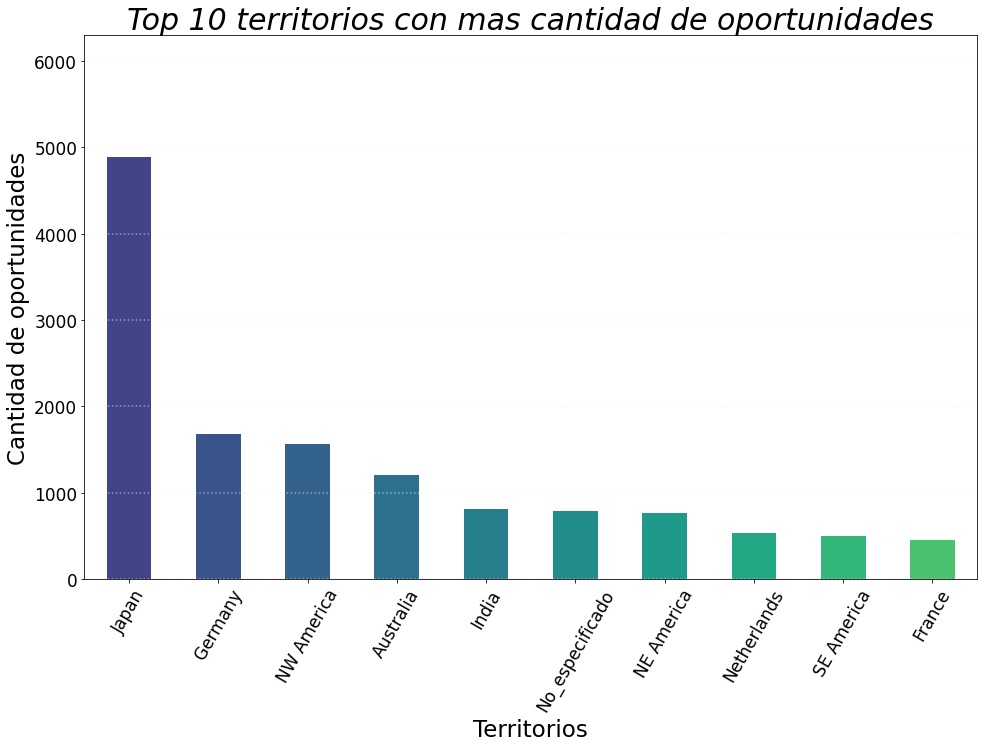

In [ ]:
grafiquito = top10['Total opportunities'].plot(kind='bar', figsize=(16,10), rot=60, color=colores, fontsize=17)
ax = plt.gca()
plt.title('Top 10 territorios con mas cantidad de oportunidades', fontsize=30, fontstyle='oblique')
ax.set_ylabel('Cantidad de oportunidades',fontsize=23)
ax.set_xlabel('Territorios', fontsize=23)


lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.5, color='#eeeeee')

### Sin No_especificados

In [ ]:
top10_sin_none = oportunidades_por_pais[ oportunidades_por_pais['Territory'] != 'No_especificado' ].nlargest(10, 'Total opportunities')
top10_sin_none

,Territory,Total opportunities
9,Japan,4892
4,Germany,1682
1,NW America,1568
0,Australia,1208
6,India,809
3,NE America,760
10,Netherlands,533
2,SE America,493
8,France,449
32,Singapore,441


In [ ]:
top10_sin_none = top10_sin_none.set_index('Territory')
top10_sin_none

,Total opportunities
Territory,
Japan,4892
Germany,1682
NW America,1568
Australia,1208
India,809
NE America,760
Netherlands,533
SE America,493
France,449


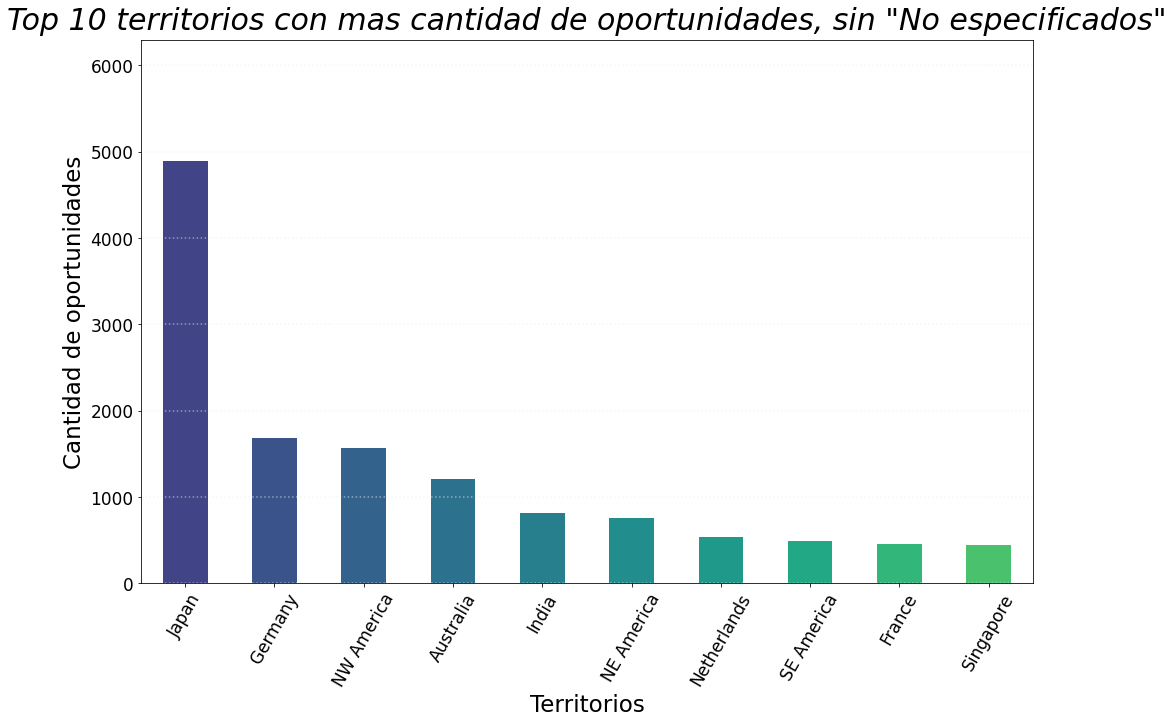

In [ ]:
grafiquito = top10_sin_none['Total opportunities'].plot(kind='bar', x='Territory', figsize=(16,10), rot=60, color=colores, fontsize=17)
ax = plt.gca()
plt.title('Top 10 territorios con mas cantidad de oportunidades, sin "No especificados"', fontsize=30, fontstyle='oblique', pad=10)
ax.set_ylabel('Cantidad de oportunidades',fontsize=23)
ax.set_xlabel('Territorios', fontsize=23)


lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.5, color='#eeeeee')